## Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.
желаемая точность  Δ
Δ
  = 3;
дисперсия  𝜎2
σ
2
  = 225;
уровень доверия  𝛽
β
  = 0.95.
Ответ округлите до целого

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
sigma = 15
delta = 3
n = int((sigma * sp.norm().ppf(0.975) / delta) ** 2)
print(f' минимально необходимый объем выборки n = {n}')

 минимально необходимый объем выборки n = 96


## Задание № 1
Постройте 98% доверительный интервал для среднего значения, если известно, что
объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯
x
¯
  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=15
σ
=
15
 .
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [6]:
def confidence_interval(N, sigma, x_mean):
    return (x_mean - (sigma*sp.norm().ppf(0.99))/np.sqrt(N)), (x_mean + (sigma*sp.norm().ppf(0.99))/np.sqrt(N))

In [7]:
x, y = confidence_interval(25, 15, 130)
int(y-x)

13

## Задание № 2
Даны две выборки роста мужчин и женщин.
Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  𝛼
α
  = 0.001.
Покажите различия визуально

In [52]:
import scipy.stats as stats

In [53]:
def t_student(arr_1, arr_2):
    n_1 = len(arr_1)
    n_2 = len(arr_2)
    mean_1 = np.mean(arr_1)
    mean_2 = np.mean(arr_2)
    s_1 = np.std(arr_1, ddof = 1)
    s_2 = np.std(arr_2, ddof = 1)
    return (mean_1-mean_2)/(np.sqrt((s_1**2)/n_1+(s_2**2)/n_2))

In [35]:
# H0 - выборки статистически неразличимы
# H1 - выборки статистически различимы

population_men  = sp.norm.rvs(loc=171, scale=19, size=1200000)  # Выборка мужчин со средним ростом 171
population_women = sp.norm.rvs(loc=165, scale=16, size=1200000)  # Выборка женщин со средним ростом 165

print(t_student(population_men, population_women))
t, p = sp.ttest_ind(a=population_men, b=population_women, equal_var=False)
print (f'{t}, {p}')

264.23752277624914
264.23752277624914, 0.0


(array([1.200000e+01, 2.511000e+03, 8.572900e+04, 9.783880e+05,
        3.719264e+06, 4.790168e+06, 2.099736e+06, 3.088660e+05,
        1.509300e+04, 2.330000e+02]),
 array([ 73.6370124 ,  91.08989522, 108.54277804, 125.99566086,
        143.44854368, 160.90142649, 178.35430931, 195.80719213,
        213.26007495, 230.71295777, 248.16584058]),
 <BarContainer object of 10 artists>)

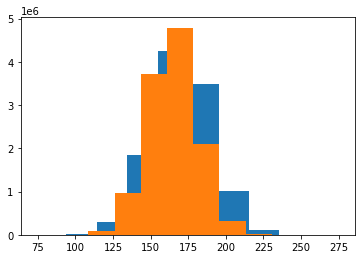

In [33]:
plt.hist(population_men, 10)
plt.hist(population_women, 10)
# Большое значение t и нулевое значение p говорят о том, что распределения роста 
# мужчин и женщин различны (различные средние и дисперсии) и различие статистически значимо

## Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:
стандартное отклонение  𝜎=150
σ
=
150
 ;
уровень доверия  𝛽
β
  = 95%;
Погрешность  Δ=50
Δ
=
50
  рублей.

In [54]:
sigma = 150
delta = 50
n = int((sigma * sp.norm().ppf(0.975) / delta) ** 2)
print(f'Объем выборки для исследования среднего чека за кофе: n = {n}')

Объем выборки для исследования среднего чека за кофе: n = 34


## Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).
Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05
α
=
0.05
 ).

In [37]:
alpha = 0.05
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [38]:
chi, pval, dof, exp = sp.chi2_contingency(observations)#Хи квадрат
critical_value = sp.chi2.ppf(0.95, dof)  
print('p-value is: ', pval)
#print('chi is: ', chi)
#print('critical_value is: ', critical_value)

print(f'{pval > alpha}')
# значение p больше уровня значимости 0.05, следовательно принимаем нулевую гипотезу, что
# ответы волшебника случайны


p-value is:  0.35396880166541644
True


## Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%
β
=
90
%
  для выборки:

In [39]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), sp.sem(data)
    h = se * sp.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

In [40]:
beta = 0.9
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
mean_confidence_interval(data, beta)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

## Задание № 6
Принадлежат ли выборки data_1 и data_2 одному множеству?
Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [41]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]
# Гипотеза H0 - выборки принадлежат одному распределению
# Гипотеза H1 - выборки не принадлежат одному распределению

In [42]:
t, p = sp.ttest_ind(a=data_1, b=data_2, equal_var=False)
print (f'{t}, {p}')

N = len(data_1) + len(data_2) - 2
t_ctrl = sp.t.ppf(0.9995, N) # рассчитаем критическое значение t, с N1 + N2 - 2 степенями свободы и уровне значимости 0.001
print(f't_ctrl = {t_ctrl}')

7.068404675178226, 2.4974180382616264e-09
t_ctrl = 3.3694197811539053


(array([1., 0., 0., 0., 2., 6., 7., 7., 6., 6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

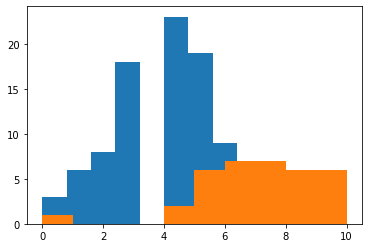

In [43]:
# C учетом того, что p < уровня значимости, а t > t_ctrl, то принимаем гипотезу H1 - что выборки не принадлежат одному распределению
plt.hist(data_2, bins=10)
plt.hist(data_1, bins=10)

## Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [44]:
# H0 - распределение нормальное
# H1 - распределение ненормальное
# p-value = 0.03

url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.dropna(how='any',inplace=True)

In [45]:
df[df.price<500].shape[0]

38085

In [46]:
mn = df[df.price<500].price.mean()
sigma = df[df.price<500].price.std()

gen = sp.norm.rvs(loc=mn, scale=sigma, size=df[df.price<500].shape[0])
# С помощью критерия хи-квадрат проверим, является ли рапределение цен на недвижимость нормальным

sp.chisquare(df[df.price<500]['price'], f_exp=gen)

Power_divergenceResult(statistic=5694098.284793696, pvalue=0.0)

In [47]:
# Получаем, что pvalue = 0.0 меньше заданного уровня значимости = 0.03
# Значит, вероятность того, что наше распределение цен на недвижимость подчиняется нормальному закону, 
# а имеющиеся данные обусловлены случайностью - равна 0, что меньше допустимого порога в 3%
# Следовательно, гипотезу H0 о принадлежности распределения к нормальному распределению мы можем смело отметать

## Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.
Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)
Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))
При каком минимальном p-value различия были бы уже значимы?
Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [48]:
np.random.seed(11)
A = sp.norm.rvs(scale=15,loc=169,size=300)
B = sp.norm.rvs(scale=14,loc=171.4,size=300)
p_value = 0.05

In [49]:
t, p = sp.ttest_ind(a=A, b=B, equal_var=False)
print (f'{t}, {p}')

-1.95300880485141, 0.051284961272800134


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  3.,  4.,  2.,  4.,
         5., 10., 10.,  9., 12.,  5., 14., 17., 27., 14., 18., 12., 21.,
        14., 22.,  9.,  8., 10., 11., 10.,  5.,  6.,  2.,  2.,  3.,  2.,
         3.]),
 array([122.95604119, 125.01444161, 127.07284203, 129.13124245,
        131.18964287, 133.24804329, 135.30644371, 137.36484413,
        139.42324455, 141.48164497, 143.54004539, 145.59844581,
        147.65684623, 149.71524665, 151.77364707, 153.8320475 ,
        155.89044792, 157.94884834, 160.00724876, 162.06564918,
        164.1240496 , 166.18245002, 168.24085044, 170.29925086,
        172.35765128, 174.4160517 , 176.47445212, 178.53285254,
        180.59125296, 182.64965338, 184.7080538 , 186.76645422,
        188.82485464, 190.88325507, 192.94165549, 195.00005591,
        197.05845633, 199.11685675, 201.17525717, 203.23365759,
        205.29205801]),
 <BarContainer object of 40 artists>)

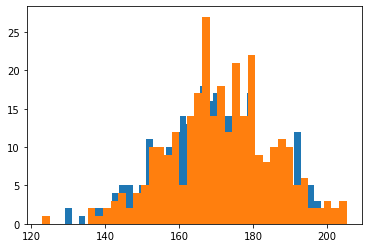

In [50]:
# полученное значение p чуть больше p_value, а, значит, формально выборки статистически одинаковы
# при p_value = 0.052 уже можно было бы считать, что выборки различны
plt.hist(A, 40)
plt.hist(B, 40)